In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Linear Discriminant Analysis Model

Model Evaluation with Correlation Threshold 0.1:
Accuracy: 0.5672676837725381
Recall: 0.2268041237113402
F1 Score: 0.35231316725978645
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke']

Model Evaluation with Correlation Threshold 0.2:
Accuracy: 0.6251238359421438
Recall: 0.394807178312333
F1 Score: 0.5222222222222223
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'Sex', 'SleepTime', 'Asthma']

Model Evaluation with Correlation Threshold 0.3:
Accuracy: 0.6997226074895978
Recall: 0.6067201221840397
F1 Score: 0.6771066368381805
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

Model Evaluation with Correlation Threshold 0.4:
Accuracy: 0.7035862888844858
Recall: 0.6059564719358533
F1 Score: 0.6796573875802998
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'Sex'

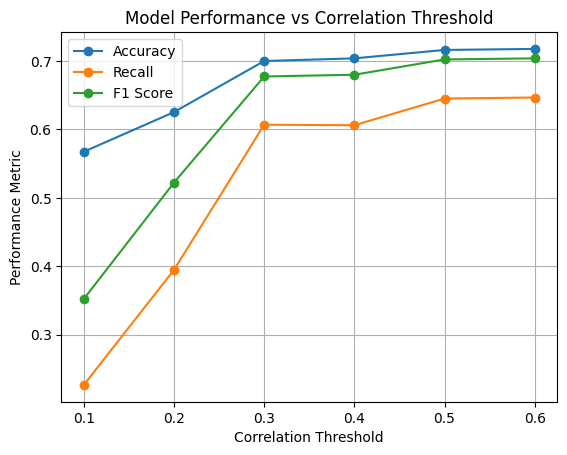

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have already defined x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the range of correlation thresholds you want to try
correlation_thresholds_to_try = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize lists to store results
accuracy_scores_corr = []
recall_scores_corr = []
f1_scores_corr = []

for threshold in correlation_thresholds_to_try:
    # Feature selection with correlation
    correlated_features = set()
    correlation_matrix = x_train.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    x_train_selected_corr = x_train.drop(columns=correlated_features)
    x_test_selected_corr = x_test.drop(columns=correlated_features)

    # Initialize the Quadratic Discriminant Analysis model
    qda_model_corr = QuadraticDiscriminantAnalysis()

    # Fit the model on the selected training data
    qda_model_corr.fit(x_train_selected_corr, y_train)

    # Make predictions on the selected test data
    y_pred_corr = qda_model_corr.predict(x_test_selected_corr)

    # Evaluate the performance of the model
    accuracy_corr = accuracy_score(y_test, y_pred_corr)
    recall_corr = recall_score(y_test, y_pred_corr)
    f1_corr = f1_score(y_test, y_pred_corr)

    # Append evaluation metrics to the lists
    accuracy_scores_corr.append(accuracy_corr)
    recall_scores_corr.append(recall_corr)
    f1_scores_corr.append(f1_corr)

    # Print model evaluation
    print(f"Model Evaluation with Correlation Threshold {threshold}:")
    print(f"Accuracy: {accuracy_corr}")
    print(f"Recall: {recall_corr}")
    print(f"F1 Score: {f1_corr}")
    print(f"Selected Features: {x_train_selected_corr.columns.tolist()}\n")

# Plot the results
plt.plot(correlation_thresholds_to_try, accuracy_scores_corr, marker='o', label='Accuracy')
plt.plot(correlation_thresholds_to_try, recall_scores_corr, marker='o', label='Recall')
plt.plot(correlation_thresholds_to_try, f1_scores_corr, marker='o', label='F1 Score')

plt.title('Model Performance vs Correlation Threshold')
plt.xlabel('Correlation Threshold')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
